In [95]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
#loading the dataset
df=pd.read_csv('../input/flight-delays/flights.csv',nrows=50000)
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2015,1,4,7,AA,1524,N499AA,DFW,LAS,915,...,1010.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49996,2015,1,4,7,AA,2316,N3FNAA,STX,MIA,915,...,1126.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49997,2015,1,4,7,AS,5,N566AS,DCA,LAX,915,...,1247.0,37.0,0,0,NaN,37.0,0.0,0.0,0.0,0.0
49998,2015,1,4,7,DL,688,N893AT,ATL,ICT,915,...,1037.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df['CANCELLED'].unique()

array([0, 1])

In [45]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   DAY                  50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   FLIGHT_NUMBER        50000 non-null  int64  
 6   TAIL_NUMBER          49941 non-null  object 
 7   ORIGIN_AIRPORT       50000 non-null  object 
 8   DESTINATION_AIRPORT  50000 non-null  object 
 9   SCHEDULED_DEPARTURE  50000 non-null  int64  
 10  DEPARTURE_TIME       48896 non-null  float64
 11  DEPARTURE_DELAY      48896 non-null  float64
 12  TAXI_OUT             48873 non-null  float64
 13  WHEELS_OFF           48873 non-null  float64
 14  SCHEDULED_TIME       50000 non-null  int64  
 15  ELAPSED_TIME         48753 non-null 

In [46]:
#creating onehot_encoder
def onehot_encode(df,column_dict):
    df=df.copy()
    for column,prefix in column_dict.items():
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df
    

In [66]:
#preprocess
def preprocess_inputs(df):
    df=df.copy()
    #missing columns
    missing_columns=df.loc[:,df.isna().mean()>0.25].columns
    
    df=df.drop(missing_columns,axis=1)
    #dropping unneeded columns
    df=df.drop(['YEAR','MONTH','FLIGHT_NUMBER','TAIL_NUMBER'],axis=1)
    #onehot_encode
    df=onehot_encode(df,column_dict={
        'AIRLINE':'AL',
        'ORIGIN_AIRPORT':'OA',
        'DESTINATION_AIRPORT':'DA'
    })
    
    #filling missing values with column means
    na_columns=df.loc[:,df.isna().mean()>0].columns
    for column in na_columns:
        df[column]=df[column].fillna(df[column].mean())
    
    #Split the dataset
    y=df['CANCELLED']
    x=df.drop('CANCELLED',axis=1)
    
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    #scaling the dataset
    
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x.columns)
    
    return x_train,x_test,y_train,y_test

In [82]:
#training the model
model=LogisticRegression()
model.fit(x_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [81]:
y_train

8950     0
38421    0
19363    0
30157    0
14294    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: CANCELLED, Length: 35000, dtype: int64

In [104]:
#creating prograam to evaluate model
def evaluate_model(model,x_test,y_test):
    model_acc=model.score(x_test,y_test)
    print('Test_Accracy:{:2f}%'.format(model_acc*100))
    y_true=np.array(y_test)
    y_pred=model.predict(x_test)
    cm=confusion_matrix(y_true,y_pred)
    clr=classification_report(y_true,y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm,annot=True,vmin=0,fmt='g',cmap='Blues',cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print('Classification Report',clr)

Test_Accracy:98.833333%


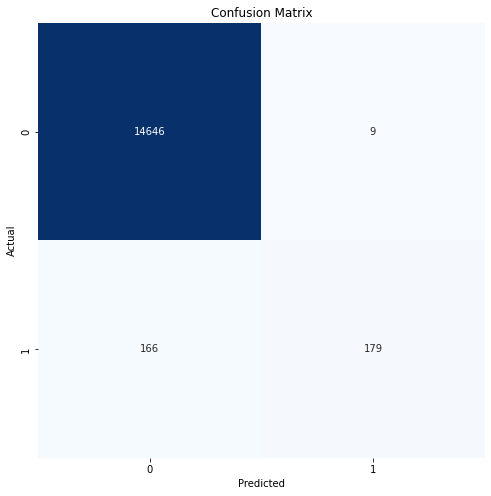

Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14655
           1       0.95      0.52      0.67       345

    accuracy                           0.99     15000
   macro avg       0.97      0.76      0.83     15000
weighted avg       0.99      0.99      0.99     15000



In [105]:
evaluate_model(model,x_test,y_test)

In [101]:
#evaluating the model
model.score(x_test,y_test)

0.9883333333333333

In [103]:
y_train.value_counts()

0    34207
1      793
Name: CANCELLED, dtype: int64

In [42]:
df.loc[:,df.isna().mean()>0].columns

Index(['TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [33]:
x.loc[:,x.isna().sum()>0].columns

Index(['TAIL_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
      dtype='object')

In [26]:
#checking for unique values
{column:len(x[column].unique()) for column in x.columns}

{'YEAR': 1,
 'MONTH': 1,
 'DAY': 4,
 'DAY_OF_WEEK': 4,
 'AIRLINE': 14,
 'FLIGHT_NUMBER': 5700,
 'TAIL_NUMBER': 4087,
 'ORIGIN_AIRPORT': 312,
 'DESTINATION_AIRPORT': 311,
 'SCHEDULED_DEPARTURE': 1116,
 'DEPARTURE_TIME': 1318,
 'DEPARTURE_DELAY': 402,
 'TAXI_OUT': 122,
 'WHEELS_OFF': 1324,
 'SCHEDULED_TIME': 417,
 'ELAPSED_TIME': 486,
 'AIR_TIME': 464,
 'DISTANCE': 1232,
 'WHEELS_ON': 1384,
 'TAXI_IN': 87,
 'SCHEDULED_ARRIVAL': 1272,
 'ARRIVAL_TIME': 1382,
 'ARRIVAL_DELAY': 424,
 'DIVERTED': 2,
 'CANCELLED': 2}

In [30]:
x

,DAY,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,4,AS,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,4,AA,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,4,US,N171US,SFO,CLT,20,18.0,-2.0,16.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,4,AA,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,4,AS,N527AS,SEA,ANC,25,24.0,-1.0,11.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4,7,AA,N499AA,DFW,LAS,915,910.0,-5.0,24.0,...,180.0,150.0,1055,1004.0,6.0,1010,1010.0,0.0,0,0
49996,4,7,AA,N3FNAA,STX,MIA,915,915.0,0.0,20.0,...,191.0,155.0,1139,1110.0,16.0,1122,1126.0,4.0,0,0
49997,4,7,AS,N566AS,DCA,LAX,915,952.0,37.0,13.0,...,355.0,329.0,2311,1234.0,13.0,1210,1247.0,37.0,0,0
49998,4,7,DL,N893AT,ATL,ICT,915,922.0,7.0,13.0,...,135.0,115.0,782,1030.0,7.0,1040,1037.0,-3.0,0,0


In [51]:
df.loc[:,df.isna().mean()>0]

,TAIL_NUMBER,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,N407AS,2354.0,-11.0,21.0,15.0,194.0,169.0,404.0,4.0,408.0,-22.0,NaN,NaN,NaN,NaN,NaN,NaN
1,N3KUAA,2.0,-8.0,12.0,14.0,279.0,263.0,737.0,4.0,741.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,N171US,18.0,-2.0,16.0,34.0,293.0,266.0,800.0,11.0,811.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,N3HYAA,15.0,-5.0,15.0,30.0,281.0,258.0,748.0,8.0,756.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,N527AS,24.0,-1.0,11.0,35.0,215.0,199.0,254.0,5.0,259.0,-21.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,N499AA,910.0,-5.0,24.0,934.0,180.0,150.0,1004.0,6.0,1010.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
49996,N3FNAA,915.0,0.0,20.0,935.0,191.0,155.0,1110.0,16.0,1126.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
49997,N566AS,952.0,37.0,13.0,1005.0,355.0,329.0,1234.0,13.0,1247.0,37.0,NaN,37.0,0.0,0.0,0.0,0.0
49998,N893AT,922.0,7.0,13.0,935.0,135.0,115.0,1030.0,7.0,1037.0,-3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#checking  for missing values in the dataset
df.isna().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER               59
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1104
DEPARTURE_DELAY         1104
TAXI_OUT                1127
WHEELS_OFF              1127
SCHEDULED_TIME             0
ELAPSED_TIME            1247
AIR_TIME                1247
DISTANCE                   0
WHEELS_ON               1161
TAXI_IN                 1161
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1161
ARRIVAL_DELAY           1247
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    48862
AIR_SYSTEM_DELAY       34592
SECURITY_DELAY         34592
AIRLINE_DELAY          34592
LATE_AIRCRAFT_DELAY    34592
WEATHER_DELAY          34592
dtype: int64

In [54]:
#getting mean of total data as missing
df.isna().mean()

YEAR                   0.00000
MONTH                  0.00000
DAY                    0.00000
DAY_OF_WEEK            0.00000
AIRLINE                0.00000
FLIGHT_NUMBER          0.00000
TAIL_NUMBER            0.00118
ORIGIN_AIRPORT         0.00000
DESTINATION_AIRPORT    0.00000
SCHEDULED_DEPARTURE    0.00000
DEPARTURE_TIME         0.02208
DEPARTURE_DELAY        0.02208
TAXI_OUT               0.02254
WHEELS_OFF             0.02254
SCHEDULED_TIME         0.00000
ELAPSED_TIME           0.02494
AIR_TIME               0.02494
DISTANCE               0.00000
WHEELS_ON              0.02322
TAXI_IN                0.02322
SCHEDULED_ARRIVAL      0.00000
ARRIVAL_TIME           0.02322
ARRIVAL_DELAY          0.02494
DIVERTED               0.00000
CANCELLED              0.00000
CANCELLATION_REASON    0.97724
AIR_SYSTEM_DELAY       0.69184
SECURITY_DELAY         0.69184
AIRLINE_DELAY          0.69184
LATE_AIRCRAFT_DELAY    0.69184
WEATHER_DELAY          0.69184
dtype: float64

In [67]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
x_train

,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,...,DA_TYR,DA_TYS,DA_UST,DA_VEL,DA_VLD,DA_VPS,DA_WRG,DA_XNA,DA_YAK,DA_YUM
8950,-1.284038,-1.284038,0.618054,0.488959,-0.432089,0.462918,0.564669,-0.366048,-0.448989,-0.534683,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276
38421,0.869304,0.869304,0.058774,0.004530,-0.650367,-0.484160,-0.016769,-0.249066,-0.172758,-0.088974,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276
19363,-0.207367,-0.207367,-0.535080,-0.505708,0.198491,-0.168467,-0.441437,-0.859971,-0.909373,-0.845329,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276
30157,-0.207367,-0.207367,1.740681,1.668265,-0.383583,1.304765,1.759295,-0.444036,-0.080681,-0.305075,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276
14294,-0.207367,-0.207367,-1.415692,-1.500375,-0.480595,-0.168467,-1.435636,1.284694,1.432013,1.491268,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0.869304,0.869304,1.240380,1.205675,-0.068293,1.304765,1.217546,-0.431038,-0.212219,-0.440139,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276
32511,0.869304,0.869304,-1.181811,-1.194629,-0.504849,-0.694622,-1.219333,-1.106932,-1.106681,-0.966886,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276
5192,-1.284038,-1.284038,-0.195445,-0.221801,-0.383583,-0.905083,-0.250932,-0.587013,-0.698912,-0.534683,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276
12172,-1.284038,-1.284038,1.299358,1.598777,2.090232,1.199534,1.608479,-0.729991,-0.580527,-0.750784,...,-0.016906,-0.034246,-0.005345,-0.010691,-0.013094,-0.028797,-0.010691,-0.035479,-0.009259,-0.019276


In [58]:
x.isna().sum()

DAY                    0
DAY_OF_WEEK            0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
                      ..
DA_VPS                 0
DA_WRG                 0
DA_XNA                 0
DA_YAK                 0
DA_YUM                 0
Length: 655, dtype: int64